In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
%matplotlib notebook

In [39]:
def pickle_savefig(fig,figname):
    matplotlib_name = 'figs/' + figname + '_plt.p'
    with open(matplotlib_name,'wb') as f:
        pickle.dump(fig,f)
    fig.savefig('figs/' + figname +'.png')

# Cost plots
Plots for illustrating how the agent is penalised

## Violate voltage

<IPython.core.display.Javascript object>


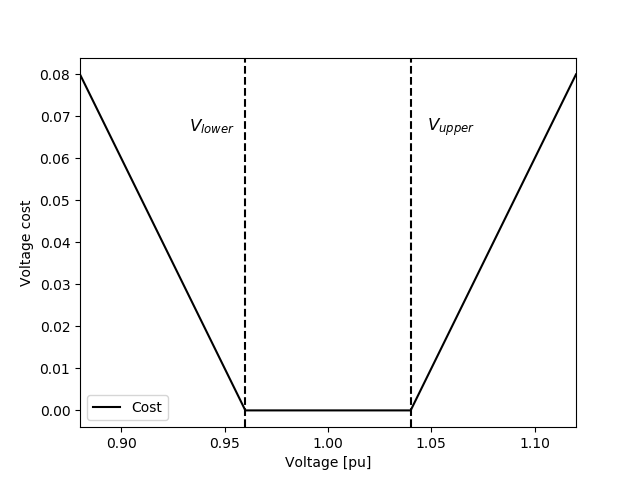

In [70]:
tol = 0.04
v_max = 1 + tol
v_min = 1 - tol
v = np.linspace(0.88,1.12,100)
cost = np.zeros_like(v)
cost[v < v_min] = v_min - v[v < v_min]
cost[v > v_max] = v[v > v_max] - v_max
df = pd.DataFrame(cost, columns=['Cost'])
df['Voltage [pu]'] = v


fig,ax = plt.subplots()
ax.axvline(v_min,linestyle='--', color='black')
ax.axvline(v_max,linestyle='--', color='black')
ax.set_ylabel('Voltage cost')
ax.text(0.7, 0.8, '$V_{upper}$',transform=ax.transAxes, fontsize=12)
ax.text(0.22, 0.8, '$V_{lower}$',transform=ax.transAxes, fontsize=12)


df.plot(x='Voltage [pu]', ax=ax, color='black')




In [71]:
fig.savefig('figs/voltage_cost.png')

## Current cost

<IPython.core.display.Javascript object>


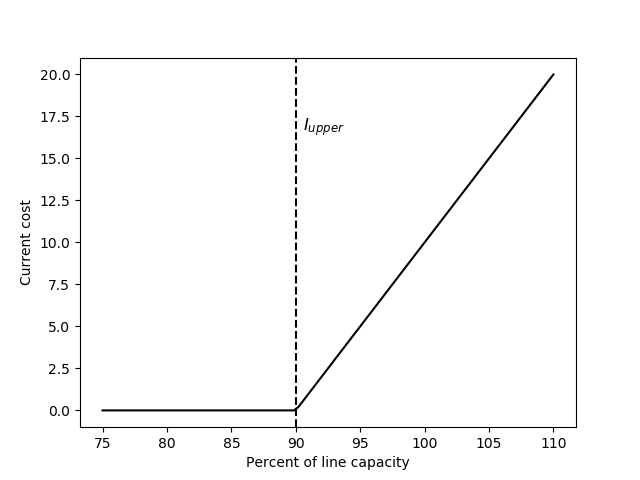

In [72]:
i_max = 90
i = np.linspace(75,110,100)
cost = np.zeros_like(i)
cost[i > i_max] = i[i > i_max] - i_max
df = pd.DataFrame(cost, columns=['Cost'])
df['Current'] = i


fig,ax = plt.subplots()
ax.axvline(i_max,linestyle='--', color='black')
ax.set_ylabel('Current cost')
ax.set_xlabel('Percent of line capacity')
ax.text(0.45, 0.8, '$I_{upper}$',transform=ax.transAxes, fontsize=12)
ax.plot(i,cost, color='black')

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
#ax.set_xticks([0,i_max])
#ax.set_yticks([0,0.2])

#df.plot(x='Current', ax=ax, color='black')




In [73]:
fig.savefig('figs/current_cost.png')

## Reward shaping
First RL tasks where agent should meet demand in 2-bus system

<IPython.core.display.Javascript object>


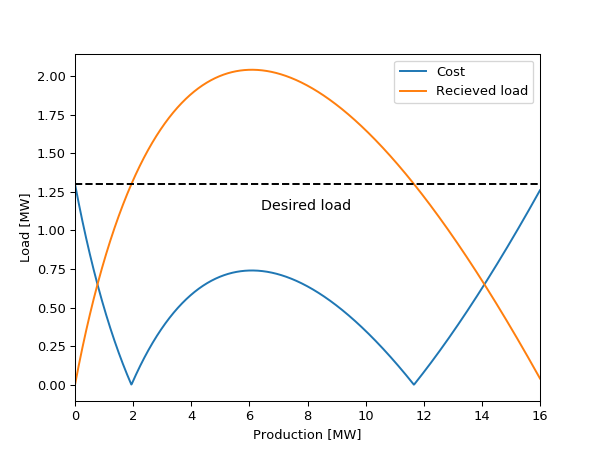

Text(0.4, 0.55, 'Desired load')

In [36]:
data_path = 'C:\\Users\\vegar\\Dropbox\\Master\\thesis.git\\data\\two_bus_load_balancing.csv'
df = pd.read_csv(data_path)
data = df[['prod','cost1','busload']]
data /= 1000
data = data.rename(columns={'prod':'Production [MW]','cost1':'Cost','busload':'Recieved load'})

fig, ax = plt.subplots()
data.plot(x='Production [MW]',ax=ax)
ax.axhline(1.3,color='black',linestyle='--')
ax.set_ylabel('Load [MW]')
ax.text(0.4, 0.55, 'Desired load',transform=ax.transAxes, fontsize=11)


In [40]:
#pickle_savefig(fig,'twobus_load_balance')